## İsmail Güven 18050111016
## Zeynep Afat   18050111034

# Load and investigate data

Load data

In [41]:
import pandas as pd

df = pd.read_csv('spamData.csv', encoding='latin-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   rawText     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Remove unnecessary attributes / columns

In [42]:
df.drop(df.columns[4], axis=1, inplace=True)
df.drop(df.columns[3], axis=1, inplace=True)
df.drop(df.columns[2], axis=1, inplace=True)

Investigate data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   rawText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [44]:
df.shape

(5572, 2)

In [45]:
df.head()

,target,rawText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


As you can see we have target (or y) as spam/ham and we have rawText which contains the raw text message

In [46]:
import numpy as np

np.unique(df.target)

array(['ham', 'spam'], dtype=object)

In [47]:
x = list(df['rawText'])
y = list(df['target'])

x

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

# Prepare feature vectors from raw text

Raw text has varying size and not regular, so it is not useful as an input data for classification methods which expects feature vectors with fixed dimension and numeric values. In natural language processing (NLP) one way is to build a dictionary where all words are extracted using all the textual data. Then, for each data a feature vector will be constructed that contains frequencies of the words in the dictionary. Note that, number of words can be huge (in this dataset dictionary size is 13496). So, for spam dataset, original data contains 5572 texts then we will construct a suitable data with 5572 rows (n) and 13496 columns/attributes (p).

In [48]:
class tokenizer:
    def __init__(self, text_data):
        self.vocab = {}
        self.__get_vocab(text_data)
        
    def convert_text_dataset_to_matrix(self, X):
        vocab = self.vocab
        result = []       
        for text in tqdm(X):
            vector = self.__text_to_vector(text)
            result.append(vector)
        return result
    
    def __get_vocab(self, text_data):
        word_id = 0
        for text in text_data:
            words = text.split()
            for word in words:
                word = word.lower()
                if word not in self.vocab:
                    self.vocab[word] = word_id
                    word_id += 1
        print(f'Dictionary size : {len(self.vocab)}')
    
    def __text_to_vector(self, text):
        vocab = self.vocab
        result = list(np.zeros(len(vocab)))
        words = text.split()
        for word in words:
            word = word.lower()
            if word in vocab:
                result[vocab[word]] += 1
        return result

In [49]:
from tqdm import tqdm

tz = tokenizer(x)

Dictionary size : 13496


In [50]:
X = tz.convert_text_dataset_to_matrix(x)

100%|██████████| 5572/5572 [00:03<00:00, 1783.20it/s]


In [51]:
n = len(X)
p = len(X[0])

print('Number of data in X is ', n, ' (n)')
print('Dimension of feature vector (dictionary size) is ', p, ' (p)')

Number of data in X is  5572  (n)
Dimension of feature vector (dictionary size) is  13496  (p)


# Naive Bayes classifier
###  FP = 90 , FN = 23   -> 113 samples are misclassified 

Divide your data as train and test data using train-test-split (70% train, 30% test)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

print(f'Training set size is {len(X_train)} rows')
print(f'Test set size is {len(X_test)} rows')
print(f'Train + test set size is {len(X_train) + len(X_test)} rows')

Training set size is 3900 rows
Test set size is 1672 rows
Train + test set size is 5572 rows


Use Naive Bayes to fit on train data

In [53]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Do prediction on test data

In [54]:
y_pred = nb.predict(X_test)

In [55]:
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Show classification performance

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Train Accuracy: ', accuracy_score(y_train, nb.predict(X_train)))
print()

Train Accuracy:  0.9876923076923076



In [57]:
print('Test Accuracy: ', accuracy_score(y_test, y_pred))
print()

Test Accuracy:  0.9324162679425837



In [58]:
conf_mtrx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(conf_mtrx)
print()

print('Classification Report')
print(classification_report(y_test, y_pred))

Confusion Matrix
[[1367   90]
 [  23  192]]

Classification Report
              precision    recall  f1-score   support

         ham       0.98      0.94      0.96      1457
        spam       0.68      0.89      0.77       215

    accuracy                           0.93      1672
   macro avg       0.83      0.92      0.87      1672
weighted avg       0.94      0.93      0.94      1672



Plot Confusion Matrix

In [59]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

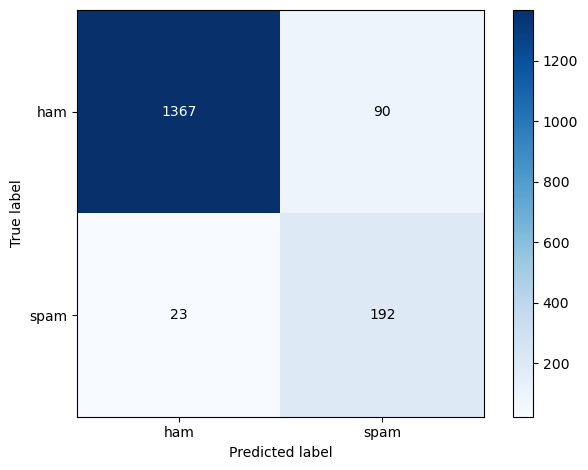

In [60]:
plot_confusion_matrix(conf_mtrx, np.unique(df.target), cmap=plt.cm.Blues)

## KNN Classifier
###  FP = 2 , FN = 76   -> 78 samples are misclassified 

In [131]:
from sklearn.neighbors import KNeighborsClassifier

k = 1;
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [132]:
y_pred_knn

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [133]:
print('Train Accuracy: ', accuracy_score(y_train, knn.predict(X_train)))
print()

Train Accuracy:  1.0



In [134]:
print('Test Accuracy: ', accuracy_score(y_test, y_pred_knn))
print()

Test Accuracy:  0.9533492822966507



In [135]:
conf_mtrx = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix')
print(conf_mtrx)
print()

print('Classification Report')
print(classification_report(y_test, y_pred_knn))

Confusion Matrix
[[1455    2]
 [  76  139]]

Classification Report
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1457
        spam       0.99      0.65      0.78       215

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [136]:
def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

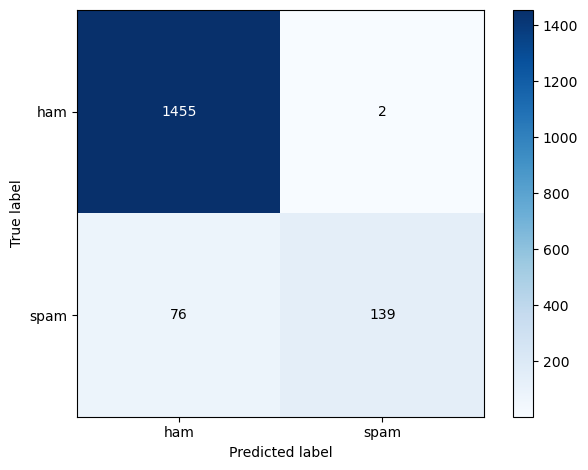

In [137]:
plot_confusion_matrix(conf_mtrx, np.unique(df.target), cmap=plt.cm.Blues)

## SVM Classifier

###  FP = 3 , FN = 26   -> 29 samples are misclassified 

In [208]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear')
#svm_classifier = svm.SVC(kernel='linear', probability=True, random_state=0)
svm_classifier.fit(X_train, y_train).decision_function(X_test)

array([-1.49556586,  1.48666422, -1.63118093, ..., -1.73994896,
       -0.80640817, -0.82666787])

In [209]:
y_pred_svm = svm_classifier.predict(X_test)

In [210]:
y_pred_svm

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [211]:
print('Train Accuracy: ', accuracy_score(y_train, svm_classifier.predict(X_train)))
print()

Train Accuracy:  1.0



In [212]:
print('Test Accuracy: ', accuracy_score(y_test, y_pred_svm))
print()

Test Accuracy:  0.9826555023923444



In [213]:
conf_mtrx = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix')
print(conf_mtrx)
print()

print('Classification Report')
print(classification_report(y_test, y_pred_svm))

Confusion Matrix
[[1454    3]
 [  26  189]]

Classification Report
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1457
        spam       0.98      0.88      0.93       215

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [214]:
def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

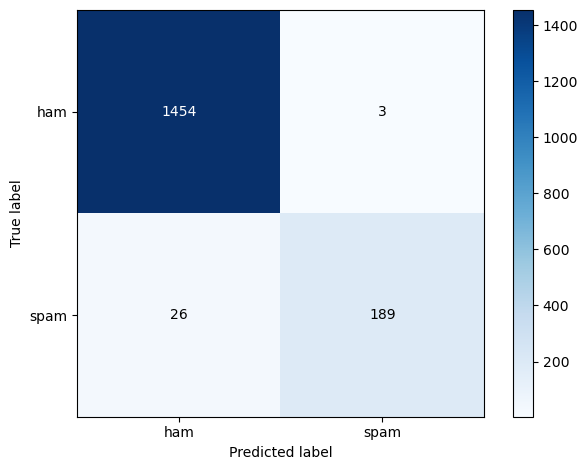

In [37]:
plot_confusion_matrix(conf_mtrx, np.unique(df.target), cmap=plt.cm.Blues)

## 3)Precision, Recall and F-Score/F-measure

### precision_score indicates that  it is correct only (returning value from precision_score )% of the time 
### recall_score indicates that  it only detects (returning value from precision_score)% of the the value we want to target

### precision = TP / TP + FP
### recall = TP / TP + FN
### It is often convenient to combine precision and recall into a single metric called the F1 score

### According to confusion matrix and metrices by precision score and F1 score we use SVM therefore we can use  this e-mail service.

In [215]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
y_test = np.asarray(y_test)


print("Precision score for Bayes",precision_score(y_test, y_pred,pos_label='ham'))
print("Precision score for KNN" ,precision_score(y_test, y_pred_knn,pos_label='ham'))
print("Precision score for SVM", precision_score(y_test, y_pred_svm,pos_label='ham'))
print("")
print("Recall score for Bayes",recall_score(y_test, y_pred,pos_label='ham'))
print("Recall score for KNN" ,recall_score(y_test, y_pred_knn,pos_label='ham'))
print("Recall score for SVM", recall_score(y_test, y_pred_svm,pos_label='ham'))
print("")
print("F1 score for Bayes",f1_score(y_test, y_pred,pos_label='ham'))
print("F1 score for KNN" ,f1_score(y_test, y_pred_knn,pos_label='ham'))
print("F1 score for SVM", f1_score(y_test, y_pred_svm,pos_label='ham'))

Precision score for Bayes 0.983453237410072
Precision score for KNN 0.9503592423252776
Precision score for SVM 0.9824324324324324

Recall score for Bayes 0.938229238160604
Recall score for KNN 0.9986273164035689
Recall score for SVM 0.9979409746053535

F1 score for Bayes 0.9603090972953988
F1 score for KNN 0.9738955823293173
F1 score for SVM 0.9901259788900237


# ROC Curves

#### Target scores, can either be probability estimates of the positiveclass, confidence values, or non-thresholded measure of decisions (as returned by :term:`decision_function` on some classifiers).

    fpr : ndarray of shape (>2,)
        Increasing false positive rates such that element i is the false
        positive rate of predictions with score >= `thresholds[i]`.
    tpr : ndarray of shape (>2,)
        Increasing true positive rates such that element `i` is the true
        positive rate of predictions with score >= `thresholds[i]`.
    thresholds : ndarray of shape = (n_thresholds,)
        Decreasing thresholds on the decision function used to compute
        fpr and tpr. `thresholds[0]` represents no instances being predicted
        and is arbitrarily set to `max(y_score) + 1`. 

In [237]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict ##it returns the predictions made on each test fold.
y_scores = cross_val_predict(svm_classifier, X_test, y_test, cv=3,method='decision_function')
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label ='ham')


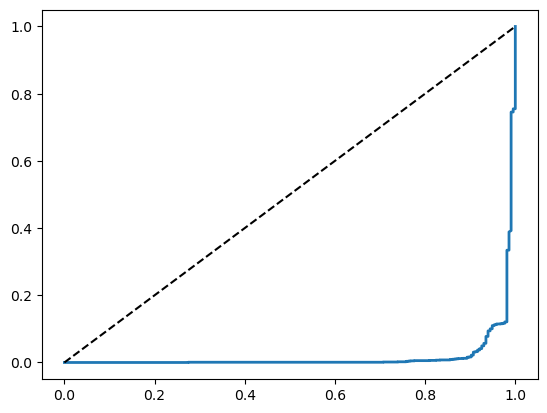

In [238]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [239]:
# One way to compare classifiers is to measure the area under the curve (AUC). A perfect
# classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
# have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores)

0.9818678073773763

In [240]:
y_probas_knn = cross_val_predict(knn, X_test, y_test, cv=3,method="predict_proba") # score = proba of positive class
y_scores_knn = y_probas_knn[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test,y_scores_knn,pos_label ='ham')

y_probas_nb = cross_val_predict(nb, X_test, y_test, cv=3,method="predict_proba") # score = proba of positive class
y_scores_nb = y_probas_nb[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test,y_scores_nb,pos_label ='ham')

## As you can see in plot, the SVM’s ROC curve looks much better than the others, it comes much closer to the corner.

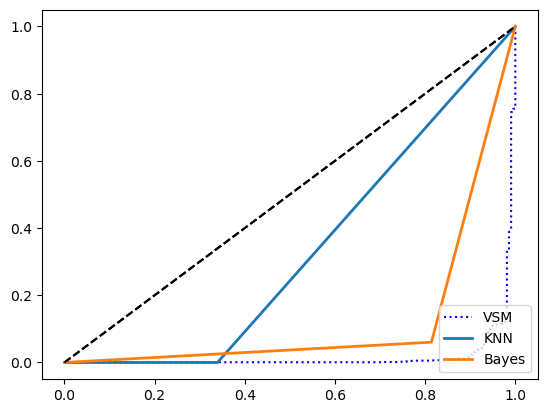

In [241]:
plt.plot(fpr, tpr, "b:", label="VSM")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plot_roc_curve(fpr_nb, tpr_nb, "Bayes")
plt.legend(loc="lower right")
plt.show()

## Report
In this project we used 3 different classifiers to classify spam emails according to spamData.csv.
Firstly we built train and test data to get train accuracy and test accuracy by using sklearn metrics, using Naive Bayes, KNN, and SVM, Plotted confusion matrix, compared each classifications with comparing confusion matrix and Receiver operating characteristic.
In conclusion SVM classifer is best choice for this dataset to detect missed e-mail.